In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive


In [252]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [253]:
seed = 45 #29

In [254]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UP_diplomaturaIA/TP2/smoking_prediction.xlsx - smoking_prediction.csv")

In [255]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,3.38,0.04,0.04,0.04,0.04,...,0.51,0.04,0.00,0.75,0.79,1.13,Y,0,Y,0
1,1,F,40,160,60,3.38,0.01,0.00,0.04,0.04,...,0.50,0.04,0.00,0.92,0.79,0.75,Y,0,Y,0
2,2,M,55,170,60,3.33,0.01,0.01,0.04,0.04,...,0.63,0.04,0.04,0.88,0.67,0.92,Y,0,N,1
3,3,M,40,165,70,3.67,0.05,0.05,0.04,0.04,...,0.59,0.04,0.04,0.79,1.08,0.75,Y,0,Y,0
4,4,F,40,155,60,3.58,0.04,0.04,0.04,0.04,...,0.50,0.04,0.00,0.67,0.58,0.92,Y,0,N,0


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   50000 non-null  int64  
 1   gender               50000 non-null  object 
 2   age                  50000 non-null  int64  
 3   height(cm)           50000 non-null  int64  
 4   weight(kg)           50000 non-null  int64  
 5   waist(cm)            50000 non-null  float64
 6   eyesight(left)       50000 non-null  float64
 7   eyesight(right)      50000 non-null  float64
 8   hearing(left)        50000 non-null  float64
 9   hearing(right)       50000 non-null  float64
 10  systolic             50000 non-null  float64
 11  relaxation           50000 non-null  float64
 12  fasting blood sugar  50000 non-null  float64
 13  Cholesterol          50000 non-null  float64
 14  triglyceride         50000 non-null  float64
 15  HDL                  50000 non-null 

In [257]:
df.isna().sum()/df.shape[0]

,0
ID,0.0
gender,0.0
age,0.0
height(cm),0.0
weight(kg),0.0
waist(cm),0.0
eyesight(left),0.0
eyesight(right),0.0
hearing(left),0.0
hearing(right),0.0


In [258]:
df.shape

(50000, 27)

In [259]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   50000 non-null  int64  
 1   gender               50000 non-null  object 
 2   age                  50000 non-null  int64  
 3   height(cm)           50000 non-null  int64  
 4   weight(kg)           50000 non-null  int64  
 5   waist(cm)            50000 non-null  float64
 6   eyesight(left)       50000 non-null  float64
 7   eyesight(right)      50000 non-null  float64
 8   hearing(left)        50000 non-null  float64
 9   hearing(right)       50000 non-null  float64
 10  systolic             50000 non-null  float64
 11  relaxation           50000 non-null  float64
 12  fasting blood sugar  50000 non-null  float64
 13  Cholesterol          50000 non-null  float64
 14  triglyceride         50000 non-null  float64
 15  HDL                  50000 non-null 

In [261]:
df.gender.unique()

array(['F', 'M'], dtype=object)

In [262]:
df.oral.unique()

array(['Y'], dtype=object)

In [263]:
df.tartar.unique()

array(['Y', 'N'], dtype=object)

In [264]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,26284.994580,44.189300,164.652000,65.878700,3.415468,0.027999,0.027865,0.041026,0.041048,5.063196,...,2.388346,4.791527,0.594483,0.043708,0.018538,1.094032,1.130193,1.668978,0.213120,0.366580
std,16015.070567,12.090086,9.208778,12.831355,0.386760,0.024137,0.024297,0.006325,0.006389,0.570171,...,0.615541,1.709246,0.066414,0.017509,0.017504,0.828010,1.327440,2.110348,0.409516,0.481875
min,0.000000,20.000000,130.000000,30.000000,2.130000,0.000000,0.000000,0.040000,0.040000,2.960000,...,0.170000,0.040000,0.170000,0.040000,0.000000,0.250000,0.040000,0.040000,0.000000,0.000000
25%,12499.750000,40.000000,160.000000,55.000000,3.170000,0.010000,0.010000,0.040000,0.040000,4.670000,...,1.960000,3.830000,0.550000,0.040000,0.010000,0.790000,0.630000,0.710000,0.000000,0.000000
50%,24999.500000,40.000000,165.000000,65.000000,3.420000,0.040000,0.040000,0.040000,0.040000,5.000000,...,2.290000,4.710000,0.590000,0.040000,0.010000,0.960000,0.880000,1.040000,0.000000,0.000000
75%,40034.250000,55.000000,170.000000,75.000000,3.670000,0.040000,0.040000,0.040000,0.040000,5.420000,...,2.750000,5.670000,0.630000,0.040000,0.040000,1.210000,1.290000,1.830000,0.000000,1.000000
max,55690.000000,85.000000,190.000000,135.000000,5.380000,0.380000,0.380000,0.080000,0.080000,10.000000,...,25.750000,77.500000,0.880000,0.250000,0.460000,54.630000,121.420000,41.630000,1.000000,1.000000


**IMPORTANTE**!!! hacer una visualizacion - 1-histograma + kde 2-boxplot 3-scatterplot 4-cor plot  >>> **IMPORTANTE**!!

⭐ **Mapa de Correlación**

Correlación Positiva Fuerte (color rojo intenso): Indica que cuando esta variable sube, la probabilidad de ser fumador también sube. Anota las 2-3 variables con la correlación positiva más alta.

Correlación Negativa Fuerte (color azul intenso): Indica que cuando esta variable sube, la probabilidad de ser fumador baja. Anota las 2-3 con la correlación negativa más alta.

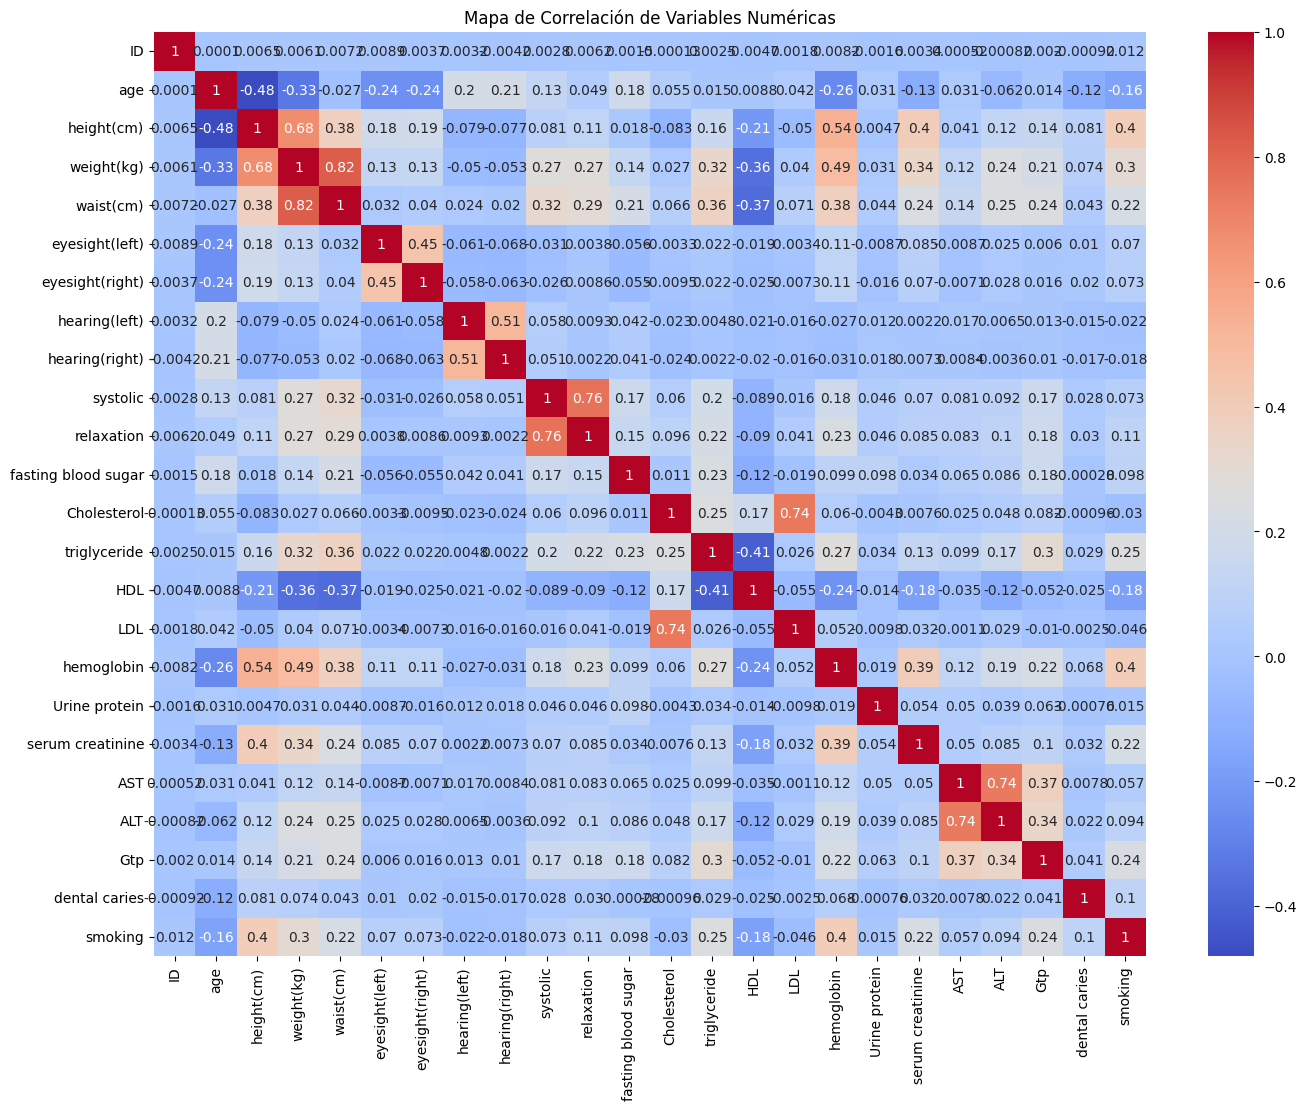

In [265]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm') # annot=True si quieres ver los números
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()

**Fuerte Redundancia entre waist(cm) y weight(kg)**  
Generalmente, waist(cm) (circunferencia de cintura) puede ser un mejor predictor de riesgos para la salud que el peso por sí solo

**Fuerte Redundancia entre AST y ALT**
es muy común que cuando el hígado está bajo estrés o sufre algún daño, ambas se eleven juntas.

**fasting blood sugar, Cholesterol** no tiene gran correlacion con smoking

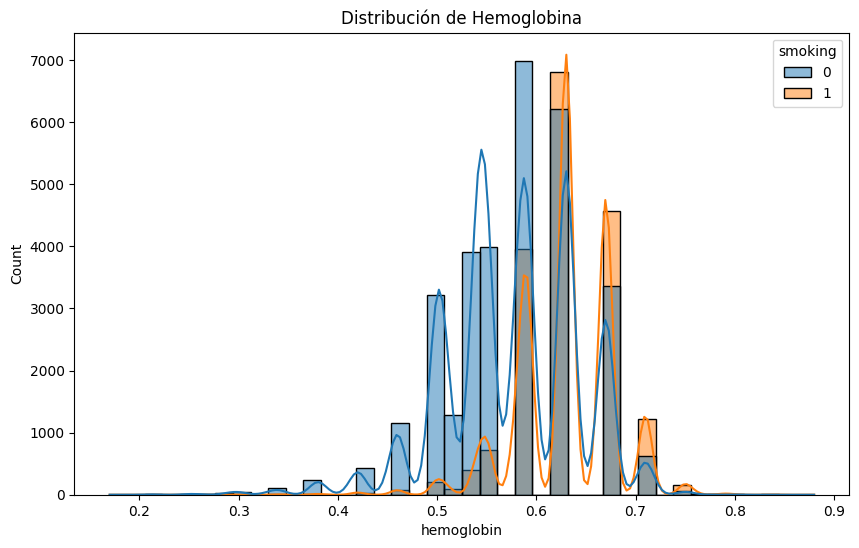

In [266]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='hemoglobin', bins=40, kde=True, hue='smoking')
plt.title('Distribución de Hemoglobina')
plt.show()

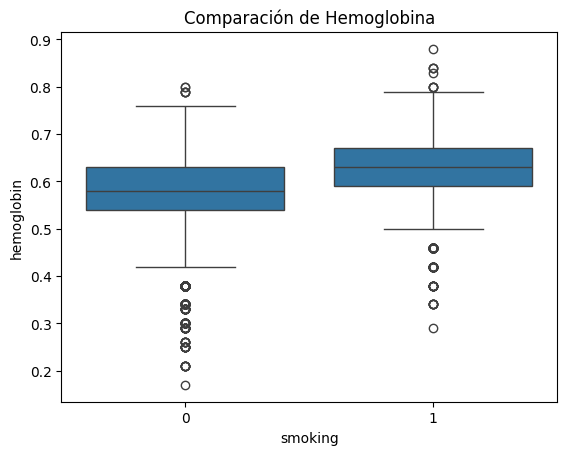

In [267]:
sns.boxplot(data=df, x='smoking', y='hemoglobin')
plt.title('Comparación de Hemoglobina')
plt.show()

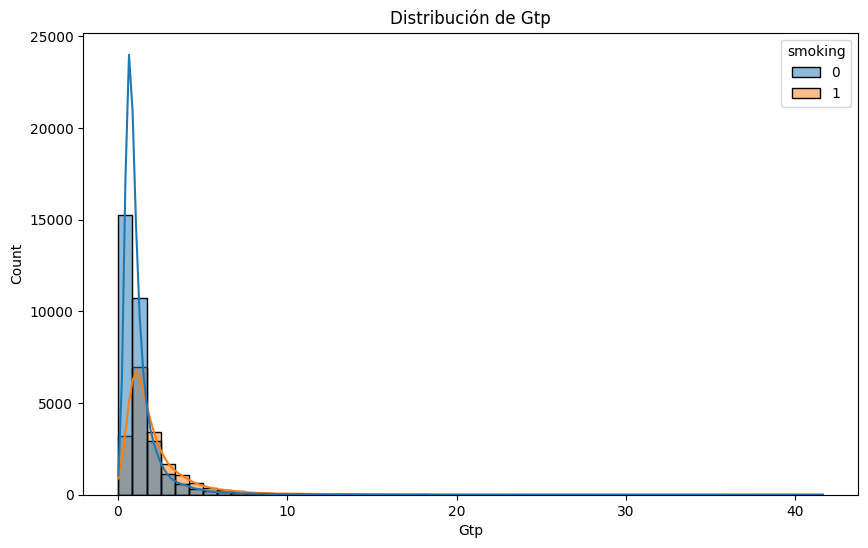

In [268]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Gtp', bins=50, kde=True, hue='smoking')
plt.title('Distribución de Gtp')
plt.show()

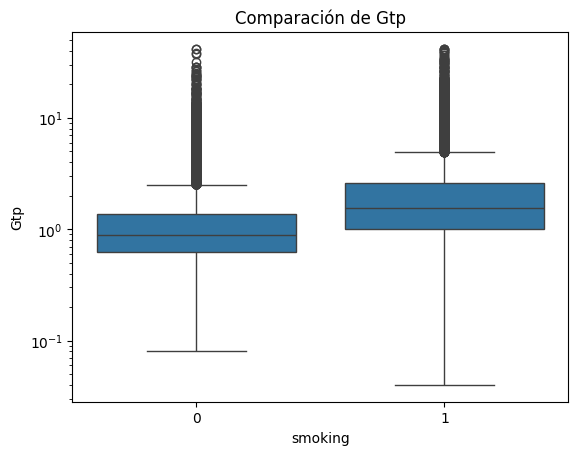

In [269]:
sns.boxplot(data=df, x='smoking', y='Gtp')
plt.title('Comparación de Gtp')
plt.yscale('log')
plt.show()

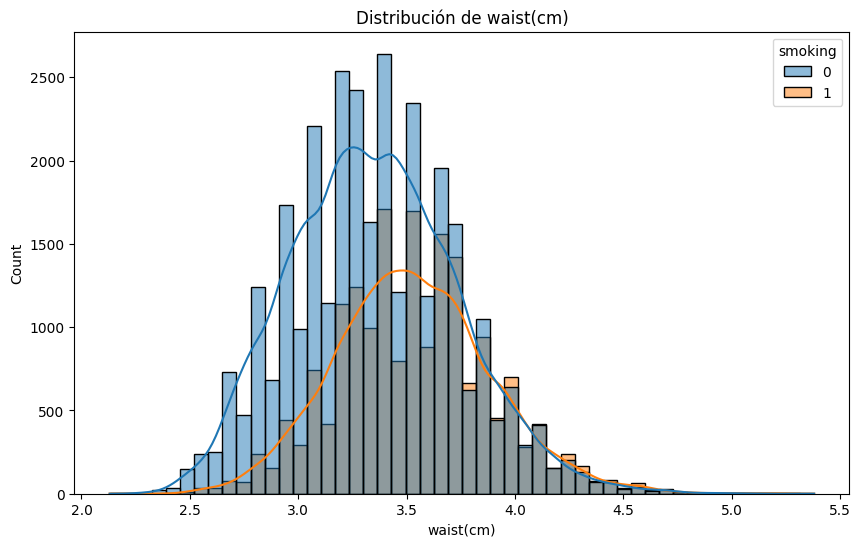

In [270]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='waist(cm)', bins=50, kde=True, hue='smoking')
plt.title('Distribución de waist(cm)')
plt.show()

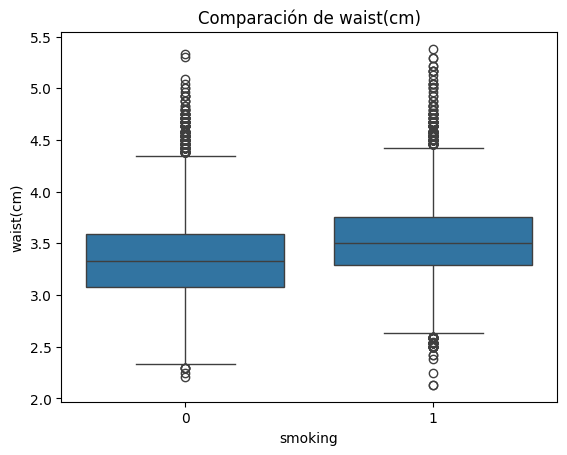

In [271]:
sns.boxplot(data=df, x='smoking', y='waist(cm)')
plt.title('Comparación de waist(cm)')
plt.show()

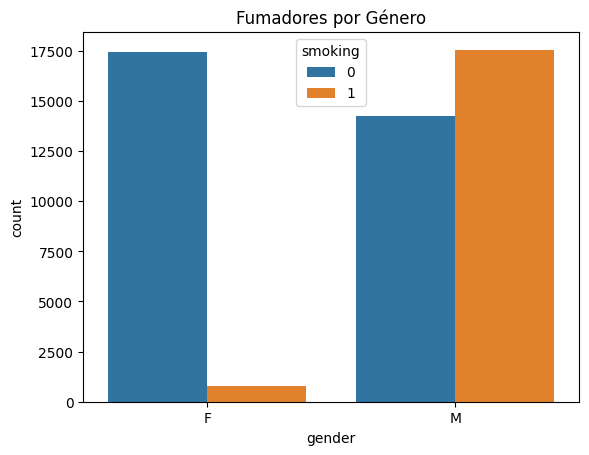

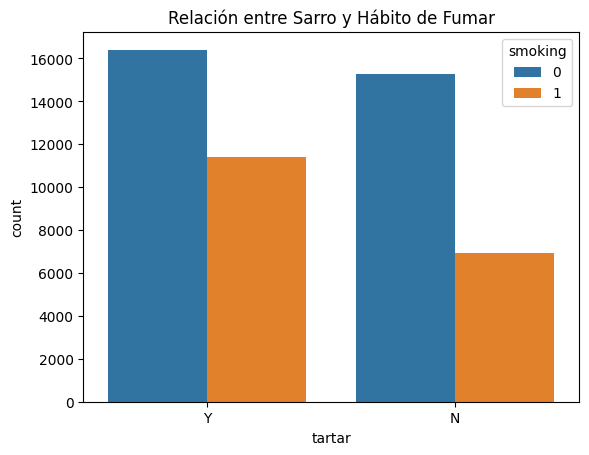

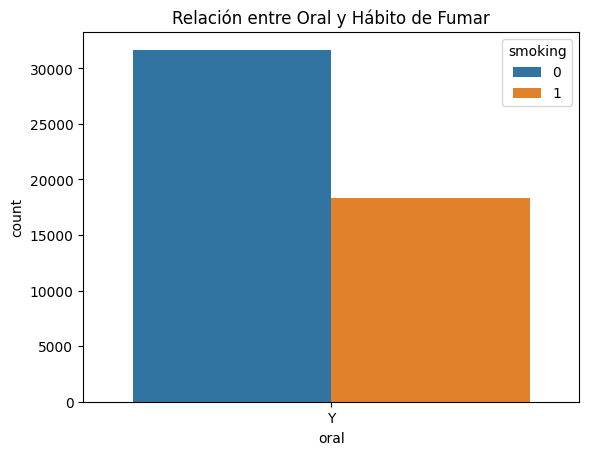

In [272]:
sns.countplot(data=df, x='gender', hue='smoking')
plt.title('Fumadores por Género')
plt.show()

sns.countplot(data=df, x='tartar', hue='smoking')
plt.title('Relación entre Sarro y Hábito de Fumar')
plt.show()

sns.countplot(data=df, x='oral', hue='smoking')
plt.title('Relación entre Oral y Hábito de Fumar')
plt.show()



*   'ID' **Eliminada por se irrelevante;**
*   'oral' **Eliminada por tener varianza cero;**
*   'weight(kg)', 'AST', 'oral', 'eyesight(left)','eyesight(right)', 'hearing(left)', 'hearing(right)' **no aporta ninguna información al modelo**.



In [273]:
to_drop = ['ID', 'weight(kg)', 'AST', 'oral', 'eyesight(left)','eyesight(right)', 'hearing(left)', 'hearing(right)']
df = df.drop(columns=to_drop)
df.head()

,gender,age,height(cm),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,3.38,4.75,3.04,3.92,8.96,3.42,3.04,5.25,0.51,0.04,0.00,0.79,1.13,0,Y,0
1,F,40,160,3.38,4.96,2.92,5.42,8.00,4.79,1.75,5.29,0.50,0.04,0.00,0.79,0.75,0,Y,0
2,M,55,170,3.33,5.75,3.58,3.71,10.08,7.58,2.29,6.29,0.63,0.04,0.04,0.67,0.92,0,N,1
3,M,40,165,3.67,4.17,2.50,4.00,13.42,10.58,1.88,9.42,0.59,0.04,0.04,1.08,0.75,0,Y,0
4,F,40,155,3.58,5.00,3.08,3.33,7.67,3.08,2.58,4.46,0.50,0.04,0.00,0.58,0.92,0,N,0


In [274]:
df.smoking.value_counts(normalize=True)*100

,proportion
smoking,
0,63.342
1,36.658


In [275]:
df.columns

Index(['gender', 'age', 'height(cm)', 'waist(cm)', 'systolic', 'relaxation',
       'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL',
       'hemoglobin', 'Urine protein', 'serum creatinine', 'ALT', 'Gtp',
       'dental caries', 'tartar', 'smoking'],
      dtype='object')

In [276]:
X = df.drop("smoking", axis=1).copy()
y = df.smoking.copy()

In [277]:
X

,gender,age,height(cm),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp,dental caries,tartar
0,F,40,155,3.38,4.75,3.04,3.92,8.96,3.42,3.04,5.25,0.51,0.04,0.00,0.79,1.13,0,Y
1,F,40,160,3.38,4.96,2.92,5.42,8.00,4.79,1.75,5.29,0.50,0.04,0.00,0.79,0.75,0,Y
2,M,55,170,3.33,5.75,3.58,3.71,10.08,7.58,2.29,6.29,0.63,0.04,0.04,0.67,0.92,0,N
3,M,40,165,3.67,4.17,2.50,4.00,13.42,10.58,1.88,9.42,0.59,0.04,0.04,1.08,0.75,0,Y
4,F,40,155,3.58,5.00,3.08,3.33,7.67,3.08,2.58,4.46,0.50,0.04,0.00,0.58,0.92,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,M,50,160,2.96,5.08,3.00,4.13,5.92,1.29,2.63,3.04,0.55,0.04,0.04,0.58,0.92,0,Y
49996,M,30,170,3.33,4.67,3.21,3.71,6.67,6.00,2.25,3.21,0.63,0.04,0.01,1.21,0.75,1,Y
49997,M,20,165,3.54,5.21,3.13,3.96,6.54,11.92,1.96,2.21,0.67,0.04,0.01,1.46,2.92,0,Y
49998,F,60,160,2.96,4.92,3.25,3.92,7.88,5.75,2.58,4.13,0.58,0.04,0.00,0.67,1.04,1,Y


In [278]:
y

,smoking
0,0
1,0
2,1
3,0
4,0
...,...
49995,1
49996,1
49997,1
49998,0


In [279]:
from sklearn.model_selection import train_test_split

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed, stratify=y)

In [281]:
y_train.value_counts(normalize=True)*100

,proportion
smoking,
0,63.3425
1,36.6575


In [282]:
y_test.value_counts(normalize=True)*100

,proportion
smoking,
0,63.34
1,36.66


In [283]:
X_train

,gender,age,height(cm),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp,dental caries,tartar
38809,F,45,170,3.46,5.00,3.33,4.63,6.21,14.63,1.58,1.67,0.50,0.04,0.01,1.71,0.83,1,Y
27695,M,30,170,3.54,4.83,3.08,3.71,9.79,5.88,1.83,6.79,0.59,0.04,0.01,0.75,1.50,1,N
32720,F,55,145,3.21,5.25,3.42,3.75,9.25,11.21,2.21,4.79,0.50,0.04,0.00,6.25,4.92,0,Y
49170,F,40,160,3.75,5.54,3.71,4.13,7.88,5.58,2.17,4.58,0.50,0.04,0.01,0.67,0.75,0,Y
48978,F,45,155,2.92,5.75,3.67,6.17,6.29,7.50,2.63,2.17,0.54,0.08,0.00,1.46,2.08,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38666,M,60,160,3.17,5.50,3.08,3.54,7.96,2.71,2.67,4.75,0.67,0.04,0.01,1.08,0.63,0,Y
4409,F,50,150,3.25,4.46,3.17,4.96,6.08,1.38,2.63,3.17,0.51,0.13,0.01,4.17,24.58,0,Y
21144,F,60,150,3.63,4.88,3.29,4.13,9.67,2.46,3.04,6.13,0.54,0.04,0.00,0.63,0.42,0,Y
26373,M,35,165,3.59,5.75,3.58,3.75,7.96,4.38,2.08,5.00,0.67,0.04,0.01,1.67,2.71,0,N


In [284]:
X_test

,gender,age,height(cm),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp,dental caries,tartar
9427,F,40,160,2.80,5.21,3.13,3.71,8.13,2.92,3.29,4.25,0.54,0.04,0.00,0.79,0.38,0,Y
22620,M,40,175,4.13,5.42,3.54,5.38,10.08,9.75,1.71,6.42,0.67,0.13,0.04,3.67,1.79,0,N
4464,M,20,170,2.92,4.58,2.92,3.83,6.67,2.29,2.58,3.63,0.63,0.04,0.04,1.08,0.79,1,N
39204,M,25,170,3.42,5.21,3.29,3.38,5.92,5.25,1.92,2.96,0.63,0.17,0.01,0.67,0.92,1,Y
47763,M,40,175,3.50,4.17,3.25,4.67,8.29,3.88,2.21,5.29,0.67,0.04,0.04,1.17,1.58,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46782,M,45,175,3.50,4.67,3.17,3.75,6.63,2.75,2.21,3.88,0.59,0.04,0.04,0.50,0.75,1,Y
30627,F,45,155,2.96,5.46,3.46,4.25,7.04,3.54,1.96,4.38,0.58,0.04,0.00,0.58,1.04,0,Y
37140,M,35,165,3.59,4.67,3.25,3.92,7.92,6.38,1.54,5.08,0.63,0.04,0.01,1.38,1.29,0,Y
716,F,45,165,3.17,4.92,3.21,3.21,8.96,3.46,3.58,4.67,0.54,0.04,0.00,0.54,0.54,0,Y


In [285]:
X_train.tartar.unique()

array(['Y', 'N'], dtype=object)

In [286]:
X_train.gender.unique()

array(['F', 'M'], dtype=object)

In [287]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 38809 to 38049
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               40000 non-null  object 
 1   age                  40000 non-null  int64  
 2   height(cm)           40000 non-null  int64  
 3   waist(cm)            40000 non-null  float64
 4   systolic             40000 non-null  float64
 5   relaxation           40000 non-null  float64
 6   fasting blood sugar  40000 non-null  float64
 7   Cholesterol          40000 non-null  float64
 8   triglyceride         40000 non-null  float64
 9   HDL                  40000 non-null  float64
 10  LDL                  40000 non-null  float64
 11  hemoglobin           40000 non-null  float64
 12  Urine protein        40000 non-null  float64
 13  serum creatinine     40000 non-null  float64
 14  ALT                  40000 non-null  float64
 15  Gtp                  40000 non-null  

In [288]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [289]:

# 1. Defines las columnas categóricas
categorical_features = ['gender', 'tartar']

# 2. Defines el preprocesador que sabe qué hacer con cada tipo de columna
preprocessor = ColumnTransformer(
    transformers=[
        # Aplica OneHotEncoder a las columnas categóricas y elimina la primera para evitar redundancia
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    # Deja las demás columnas (las numéricas) tal como están
    remainder='passthrough'
)

# 3. Defines el Pipeline que une el preprocesador y el modelo en un solo objeto
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=seed, n_jobs=-1)) #class_weight='balanced', random_state=seed, n_jobs=-1
    #('classifier', RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=seed, n_jobs=-1))
])

# 4. Ahora, simplemente entrenas el pipeline con los datos ORIGINALES (sin procesar)
pipeline_rf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'tartar'])])),
                ('classifier',
                 RandomForestClassifier(n_jobs=-1, random_state=45))])

In [290]:
X_train

,gender,age,height(cm),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp,dental caries,tartar
38809,F,45,170,3.46,5.00,3.33,4.63,6.21,14.63,1.58,1.67,0.50,0.04,0.01,1.71,0.83,1,Y
27695,M,30,170,3.54,4.83,3.08,3.71,9.79,5.88,1.83,6.79,0.59,0.04,0.01,0.75,1.50,1,N
32720,F,55,145,3.21,5.25,3.42,3.75,9.25,11.21,2.21,4.79,0.50,0.04,0.00,6.25,4.92,0,Y
49170,F,40,160,3.75,5.54,3.71,4.13,7.88,5.58,2.17,4.58,0.50,0.04,0.01,0.67,0.75,0,Y
48978,F,45,155,2.92,5.75,3.67,6.17,6.29,7.50,2.63,2.17,0.54,0.08,0.00,1.46,2.08,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38666,M,60,160,3.17,5.50,3.08,3.54,7.96,2.71,2.67,4.75,0.67,0.04,0.01,1.08,0.63,0,Y
4409,F,50,150,3.25,4.46,3.17,4.96,6.08,1.38,2.63,3.17,0.51,0.13,0.01,4.17,24.58,0,Y
21144,F,60,150,3.63,4.88,3.29,4.13,9.67,2.46,3.04,6.13,0.54,0.04,0.00,0.63,0.42,0,Y
26373,M,35,165,3.59,5.75,3.58,3.75,7.96,4.38,2.08,5.00,0.67,0.04,0.01,1.67,2.71,0,N


In [291]:
y_train

,smoking
38809,0
27695,0
32720,0
49170,0
48978,0
...,...
38666,0
4409,0
21144,0
26373,0


In [292]:
y_test

,smoking
9427,0
22620,1
4464,1
39204,1
47763,1
...,...
46782,1
30627,0
37140,0
716,0


In [293]:
from sklearn.metrics import classification_report

# **RandomForestClassifier**

In [294]:
train_pred_rf = pipeline_rf.predict(X_train)
test_pred_rf = pipeline_rf.predict(X_test)
print("Resultados del Random Forest:")
print(classification_report(y_train, train_pred_rf))
print(classification_report(y_test, test_pred_rf))

Resultados del Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25337
           1       1.00      1.00      1.00     14663

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      6334
           1       0.71      0.74      0.73      3666

    accuracy                           0.79     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.80      0.79      0.80     10000



In [295]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

'''
# 1. Define una DISTRIBUCIÓN de parámetros con regularización más FUERTE
#    Usamos distribuciones como randint para que RandomizedSearchCV explore más eficientemente.
param_dist = {
    # Mantenemos un número razonable de árboles
    'classifier__n_estimators': randint(250, 400),

    # Probamos con menos features para aumentar la diversidad de los árboles
    'classifier__max_features': ['sqrt', 'log2', 0.2, 0.3],

    # --- PARÁMETROS CLAVE PARA REGULARIZACIÓN ---
    # Forzamos a los árboles a ser menos profundos
    'classifier__max_depth': randint(5, 10),

    # Forzamos a que las hojas finales tengan un número MÁS ALTO de muestras
    'classifier__min_samples_leaf': randint(5, 15),

    # Forzamos a que las divisiones necesiten un número MÁS ALTO de muestras
    'classifier__min_samples_split': randint(10, 30),

    # EXTRA: Muy útil para datasets desbalanceados
    'classifier__class_weight': [None]
}

# 2. Configura y ejecuta la BÚSQUEDA ALEATORIA
#    n_iter=60 -> Probará 60 combinaciones al azar (mucho más rápido que GridSearchCV)
#    n_jobs=-1 -> Usa todos los núcleos de tu CPU
random_search = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_dist,
    n_iter=60,
    cv=5,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1,
    random_state=seed
)

# 3. Entrena el modelo
random_search.fit(X_train, y_train)

# 4. Muestra los mejores parámetros (probablemente serán más restrictivos)
print(f"Mejores parámetros encontrados: {random_search.best_params_}")
mejor_modelo = random_search.best_estimator_

# 5. Evalúa el modelo final. La clave es observar si la diferencia entre Train y Test se redujo.
print("\n--- Reporte del Modelo Final (Train) ---")
train_pred = mejor_modelo.predict(X_train)
print(classification_report(y_train, train_pred))

print("\n--- Reporte del Modelo Final (Test) ---")
test_pred = mejor_modelo.predict(X_test)
print(classification_report(y_test, test_pred)) '''

' \n# 1. Define una DISTRIBUCIÓN de parámetros con regularización más FUERTE\n#    Usamos distribuciones como randint para que RandomizedSearchCV explore más eficientemente.\nparam_dist = {\n    # Mantenemos un número razonable de árboles\n    \'classifier__n_estimators\': randint(250, 400),\n    \n    # Probamos con menos features para aumentar la diversidad de los árboles\n    \'classifier__max_features\': [\'sqrt\', \'log2\', 0.2, 0.3],\n    \n    # --- PARÁMETROS CLAVE PARA REGULARIZACIÓN ---\n    # Forzamos a los árboles a ser menos profundos\n    \'classifier__max_depth\': randint(5, 10),\n    \n    # Forzamos a que las hojas finales tengan un número MÁS ALTO de muestras\n    \'classifier__min_samples_leaf\': randint(5, 15),\n    \n    # Forzamos a que las divisiones necesiten un número MÁS ALTO de muestras\n    \'classifier__min_samples_split\': randint(10, 30),\n    \n    # EXTRA: Muy útil para datasets desbalanceados\n    \'classifier__class_weight\': [None]\n}\n\n# 2. Configu

**Optimizado - RandomForestClassifier**

In [296]:

# 1. Defines las columnas categóricas
categorical_features = ['gender', 'tartar']

# 2. Defines el preprocesador que sabe qué hacer con cada tipo de columna
preprocessor = ColumnTransformer(
    transformers=[
        # Aplica OneHotEncoder a las columnas categóricas y elimina la primera para evitar redundancia
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    # Deja las demás columnas (las numéricas) tal como están
    remainder='passthrough'
)

# 3. Defines el Pipeline que une el preprocesador y el modelo en un solo objeto
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    #('classifier', RandomForestClassifier(random_state=seed, n_jobs=-1)) #class_weight='balanced', random_state=seed, n_jobs=-1
    ('classifier', RandomForestClassifier(random_state=seed, n_jobs=-1, class_weight= None, max_depth= 9, max_features= 0.3, min_samples_leaf= 15, min_samples_split= 26, n_estimators= 354))
])

# 4. Ahora, simplemente entrenas el pipeline con los datos ORIGINALES (sin procesar)
pipeline_rf.fit(X_train, y_train)

print("\n--- Reporte del Modelo Final (Train) ---")
train_pred = mejor_modelo.predict(X_train)
print(classification_report(y_train, train_pred))

print("\n--- Reporte del Modelo Final (Test) ---")
test_pred = mejor_modelo.predict(X_test)
print(classification_report(y_test, test_pred))


--- Reporte del Modelo Final (Train) ---
              precision    recall  f1-score   support

           0       0.86      0.79      0.82     25337
           1       0.68      0.77      0.72     14663

    accuracy                           0.78     40000
   macro avg       0.77      0.78      0.77     40000
weighted avg       0.79      0.78      0.78     40000


--- Reporte del Modelo Final (Test) ---
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      6334
           1       0.68      0.77      0.72      3666

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.79      0.78      0.79     10000



In [297]:
# Usa tu mejor modelo ya entrenado (el pipeline completo)
y_pred_proba = mejor_modelo.predict_proba(X_test)

# Miremos las primeras 5 predicciones
print("Probabilidades predichas (No Fumador, Fumador):")
print(y_pred_proba[:5])

# Para trabajar más fácil, nos quedamos solo con las probabilidades de la clase positiva (fumador)
probabilidades_fumador = y_pred_proba[:, 1]
print("\nProbabilidades de ser Fumador:")
print(probabilidades_fumador[:5])

Probabilidades predichas (No Fumador, Fumador):
[[0.97757159 0.02242841]
 [0.37378156 0.62621844]
 [0.59171067 0.40828933]
 [0.40956555 0.59043445]
 [0.36798223 0.63201777]]

Probabilidades de ser Fumador:
[0.02242841 0.62621844 0.40828933 0.59043445 0.63201777]


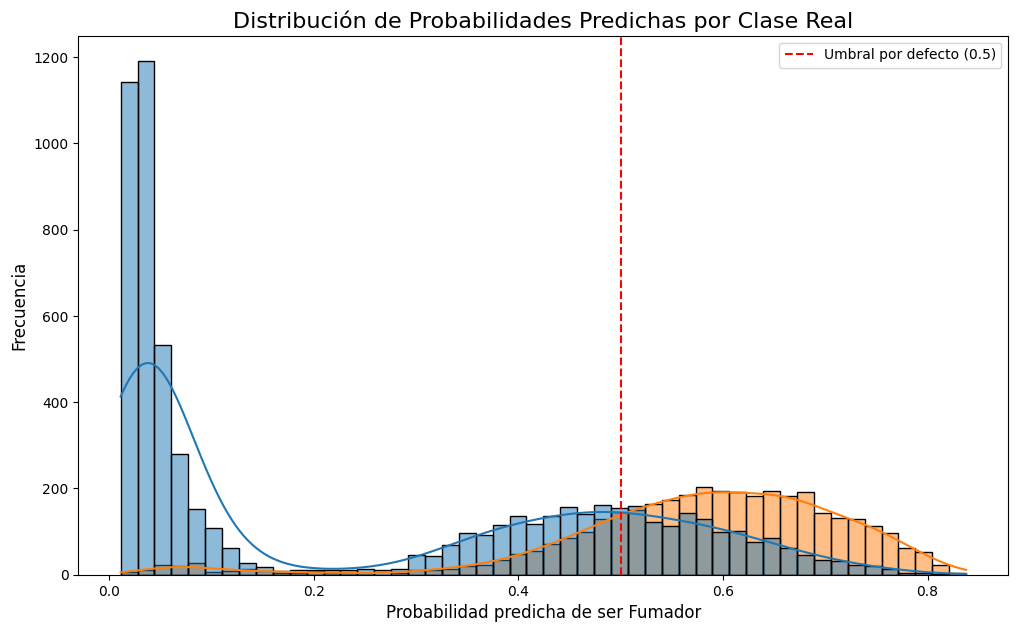

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Creamos un DataFrame para facilitar la visualización
df_probabilidades = pd.DataFrame({'probabilidad_fumador': probabilidades_fumador, 'real': y_test})

plt.figure(figsize=(12, 7))
sns.histplot(data=df_probabilidades, x='probabilidad_fumador', hue='real', kde=True, bins=50)
plt.title('Distribución de Probabilidades Predichas por Clase Real', fontsize=16)
plt.xlabel('Probabilidad predicha de ser Fumador', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Clase Real', labels=['Fumador (1)', 'No Fumador (0)'])
plt.axvline(0.5, color='red', linestyle='--', label='Umbral por defecto (0.5)')
plt.legend()
plt.show()

In [304]:
from sklearn.metrics import classification_report

# Predicciones usando el umbral por defecto de 0.5
y_pred_test_default = mejor_modelo.predict(X_test)

print("--- REPORTE DE CLASIFICACIÓN (UMBRAL POR DEFECTO = 0.5) ---")
print(classification_report(y_test, y_pred_test_default))

--- REPORTE DE CLASIFICACIÓN (UMBRAL POR DEFECTO = 0.5) ---
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      6334
           1       0.68      0.77      0.72      3666

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.79      0.78      0.79     10000



In [305]:
import numpy as np

# 1. Obtenemos las probabilidades para el conjunto de test
probabilidades_test = mejor_modelo.predict_proba(X_test)

# 2. Nos quedamos solo con la probabilidad de la clase positiva (fumador, que es la segunda columna)
prob_fumador_test = probabilidades_test[:, 1]

# 3. Definimos nuestro nuevo umbral
nuevo_umbral = 0.45

# 4. Generamos las nuevas predicciones. Si la probabilidad es > 0.40, es 1 (fumador), sino 0.
y_pred_test_nuevo_umbral = (prob_fumador_test >= nuevo_umbral).astype(int)

print(f"--- REPORTE DE CLASIFICACIÓN (NUEVO UMBRAL = {nuevo_umbral}) ---")
print(classification_report(y_test, y_pred_test_nuevo_umbral))

--- REPORTE DE CLASIFICACIÓN (NUEVO UMBRAL = 0.45) ---
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      6334
           1       0.64      0.87      0.74      3666

    accuracy                           0.77     10000
   macro avg       0.77      0.79      0.77     10000
weighted avg       0.81      0.77      0.78     10000



In [303]:
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, auc
import numpy as np

# --- Ya tenemos 'probabilidades_fumador' y 'y_test' de los pasos anteriores ---

# 1. Predicciones con el umbral por defecto (0.5) para comparar
y_pred_defecto = (probabilidades_fumador >= 0.5).astype(int)
print("--- REPORTE CON UMBRAL POR DEFECTO (0.5) ---")
print(classification_report(y_test, y_pred_defecto))

# 2. Encontrar un umbral que maximice el F1-Score (un buen balance entre Precisión y Recall)
# Usamos la curva Precision-Recall para esto
precision, recall, umbrales = precision_recall_curve(y_test, probabilidades_fumador)
# Calculamos el F1-Score para cada umbral (evitando división por cero)
f1_scores = 2 * recall * precision / (recall + precision + 1e-9)

# Localizamos el mejor umbral
mejor_indice = np.argmax(f1_scores)
mejor_umbral = umbrales[mejor_indice]

print(f"\nMejor umbral encontrado para maximizar F1-Score: {mejor_umbral:.4f}")

# 3. Opcional: Escenario para maximizar Recall (detectar más fumadores)
# Supongamos que queremos un recall de al menos 0.85
# Nota: Esto es un ejemplo, puede que no sea posible alcanzarlo sin sacrificar demasiado la precisión
nuevo_umbral_recall = umbrales[np.where(recall >= 0.85)[0][0]]
print(f"Umbral para alcanzar un Recall >= 0.85: {nuevo_umbral_recall:.4f}")

# Vamos a usar el mejor umbral para F1-Score
nuevo_umbral = mejor_umbral

# 4. Aplicamos el nuevo umbral para obtener las nuevas predicciones
y_pred_nuevo_umbral = (probabilidades_fumador >= nuevo_umbral).astype(int)

print(f"\n--- REPORTE CON UMBRAL ÓPTIMO ({nuevo_umbral:.4f}) ---")
print(classification_report(y_test, y_pred_nuevo_umbral))

--- REPORTE CON UMBRAL POR DEFECTO (0.5) ---
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      6334
           1       0.68      0.77      0.72      3666

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.79      0.78      0.79     10000


Mejor umbral encontrado para maximizar F1-Score: 0.4581
Umbral para alcanzar un Recall >= 0.85: 0.0114

--- REPORTE CON UMBRAL ÓPTIMO (0.4581) ---
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      6334
           1       0.65      0.86      0.74      3666

    accuracy                           0.78     10000
   macro avg       0.77      0.79      0.77     10000
weighted avg       0.81      0.78      0.78     10000



sacrifico precision por recall, porq en lo q estoy interesado es en encontrar los fumadores! y ahora tengo un .90 en recall de fumadores!

In [ ]:
import joblib

# Asumo que tu mejor modelo está en la variable 'mejor_modelo'
# mejor_modelo = random_search.best_estimator_

# 1. Elige un nombre para el archivo donde se guardará el modelo
filename = 'modelo_fumador_v2.2.joblib'

# 2. Usa joblib.dump para guardar el pipeline completo
joblib.dump(mejor_modelo, filename)

print(f"¡Modelo guardado exitosamente como '{filename}'!")

¡Modelo guardado exitosamente en el archivo 'modelo_fumador_v2.2.joblib'!
